## Note Book Imports

In [3]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

## Gather Data

In [4]:
boston_dataset = load_boston()

In [5]:
type(boston_dataset)

sklearn.utils.Bunch

In [6]:
boston_dataset 

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [7]:
dir(boston_dataset) # Gives list of attributes  

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [8]:
print(boston_dataset.DESCR) # Description of Data set

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

#### Data points and Features

In [9]:
type(boston_dataset.data)

numpy.ndarray

In [10]:
boston_dataset.data.shape # Gives tuple chaining of attributes

(506, 13)

In [11]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [12]:
# Actual prices in thousands
boston_dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

## Data Exploration with pandas Dataframes

In [13]:
data = pd.DataFrame(data = boston_dataset.data, columns = boston_dataset.feature_names)

In [14]:
# Adda column with the price

data['Target'] = boston_dataset.target

In [15]:
data.head()
type(data['Target'])

pandas.core.series.Series

In [16]:
data.tail() # Rows of the bottom of dataframe

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741  0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  Target  
501     21.0  391.99   9.67    22.4  
502     21.0  396.90   9.08    20.6  
503     21.0  396.90   5.64    23.9  
504     21.0  393.45   6.48    22.0  
505     21.0  396.90   7.88    11.9

In [17]:
data.count() # The no of rows pers column

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
Target     506
dtype: int64

## Cleaning Data - finding missing vlaues


In [18]:
pd.isnull(data).any() # returns 'True' if there are any missing values in column

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
Target     False
dtype: bool

In [19]:
data.info() # other way of checking the missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### Visualising Data - Histograms, Distributions and Bar  Charts

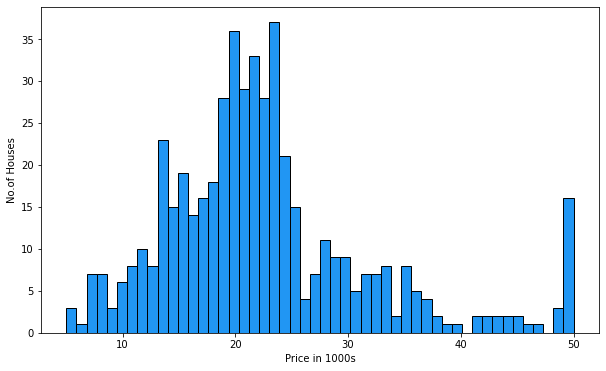

In [20]:
plt.figure(figsize=(10,6))
plt.hist(data['Target'], bins=50, ec='black', color= '#2196f3')# Ploting histogram
plt.xlabel('Price in 1000s')
plt.ylabel('No.of Houses')
plt.show()

C:\Users\rsvmu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


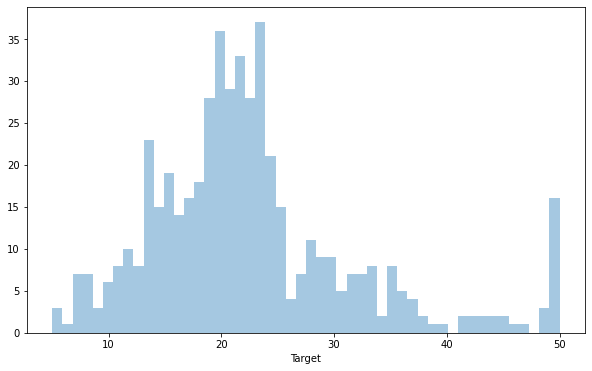

In [21]:
# Visulation using seaborn
plt.figure(figsize=(10,6))
sns.distplot(data['Target'], bins=50, hist = True, kde=False) # bins no of arguments
plt.show()

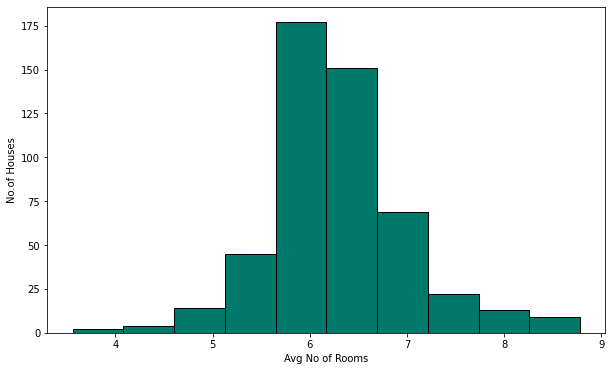

In [22]:
plt.figure(figsize=(10,6))
plt.hist(data['RM'] ,color= '#00796b', ec='black')
plt.xlabel('Avg No of Rooms')
plt.ylabel('No.of Houses')
plt.show()

In [23]:
data['RM'].mean()

6.284634387351787

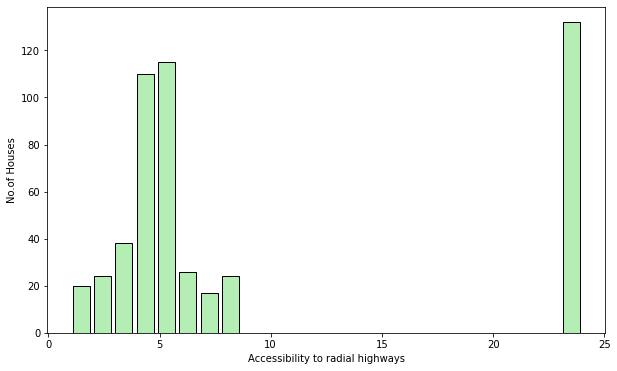

In [24]:
plt.figure(figsize=(10,6))
plt.hist(data['RAD'],bins=24,color= '#B4EEB4', ec='black',rwidth=0.8)
plt.xlabel('Accessibility to radial highways')
plt.ylabel('No.of Houses')
plt.show()

In [25]:
data['RAD'].value_counts()# How many observations in this column, in RAD, have a 
# particular value.

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
2.0      24
8.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

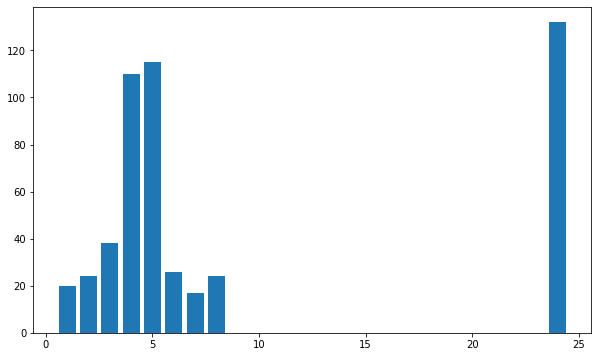

In [26]:
frequency = data['RAD'].value_counts()
#frequency.index
#frequency.axes[0] # used to retrieve the row axes labels.
plt.figure(figsize=(10,6))
plt.bar(frequency.index, height = frequency) # no use of bins in bar chart.
plt.show()

In [27]:
data['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

## Descriptive Statistics

In [28]:
data['Target'].min()

5.0

In [29]:
data['Target'].max()

50.0

In [30]:
data.min()

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
Target       5.00000
dtype: float64

In [31]:
data.max()

CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
Target      50.0000
dtype: float64

In [32]:
data.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
Target      22.532806
dtype: float64

In [33]:
data.median()

CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
Target      21.20000
dtype: float64

In [34]:
data.describe() # Gives statistics that summarize the central tendency.

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT      Target  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

## Correlation

## $$ \rho_{XY} = corr(X, Y)$$

## $$ -1.0 \leq \rho_{XY} \leq +1.0 $$

In [35]:
data['Target'].corr(data['RM']) # finding the correlation target against Room size

0.695359947071539

In [36]:
data['Target'].corr(data['PTRATIO']) # PTRATIO measure school quality

-0.5077866855375615

In [37]:
data.corr() # Pearson correlation coefficients

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
Target  -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT    Target  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
Target   0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

In [38]:
mask_s = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask_s)
mask_s[triangle_indices] = True
mask_s

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

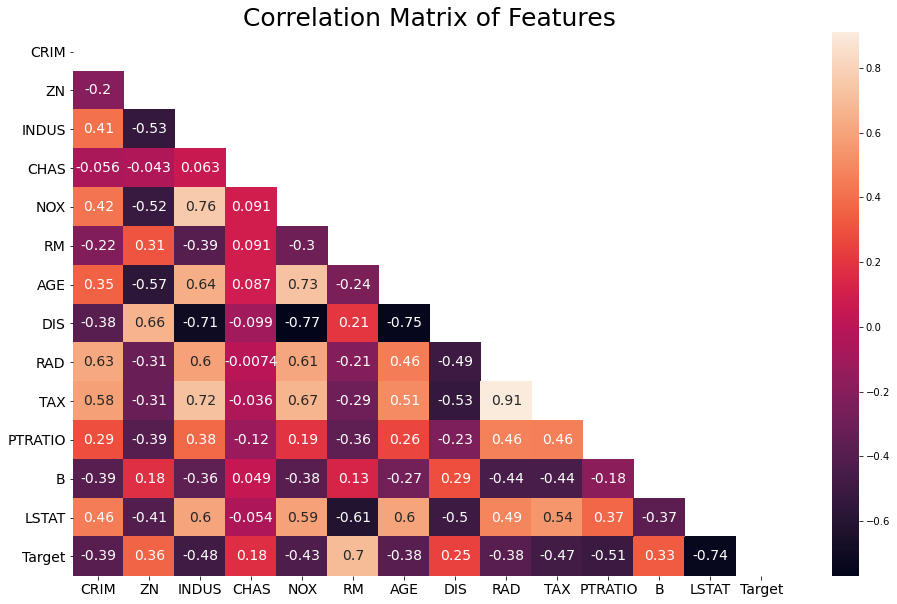

In [39]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), mask=mask_s, annot=True, annot_kws={"size":14})
plt.title('Correlation Matrix of Features',fontsize=25)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

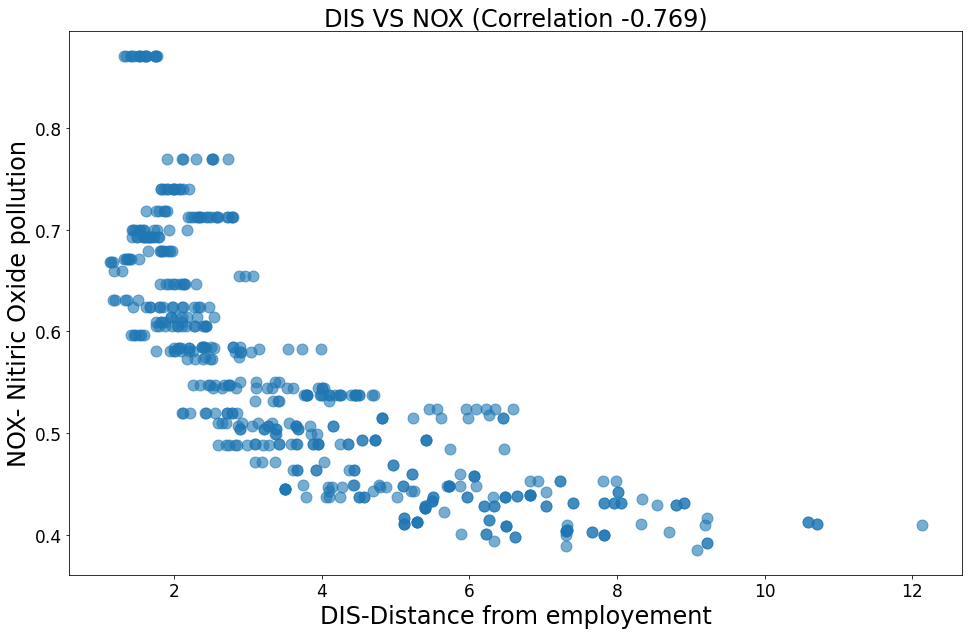

In [40]:
nox_dis_corr = data['NOX'].corr(data['DIS'])

plt.figure(figsize=(16,10))
plt.scatter(x=data['DIS'], y=data['NOX'], s=120, alpha = 0.6)

plt.title(f'DIS VS NOX (Correlation {round(nox_dis_corr, 3)})', fontsize=24)
plt.xlabel('DIS-Distance from employement', fontsize=24)
plt.ylabel('NOX- Nitiric Oxide pollution', fontsize=24)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

plt.show()

<Figure size 1080x432 with 0 Axes>

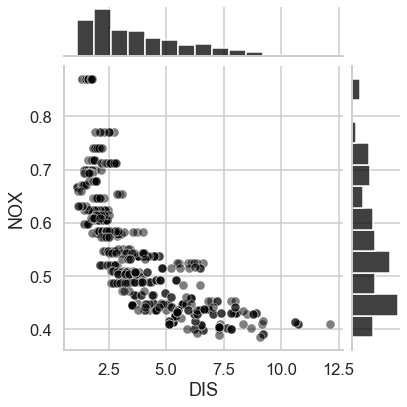

In [41]:
sns.set() ## reset's the styling of charts
plt.figure(figsize=(15,6))
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data['DIS'], y=data['NOX'], color='black', joint_kws={'alpha':0.5})
plt.show()

<Figure size 1080x432 with 0 Axes>

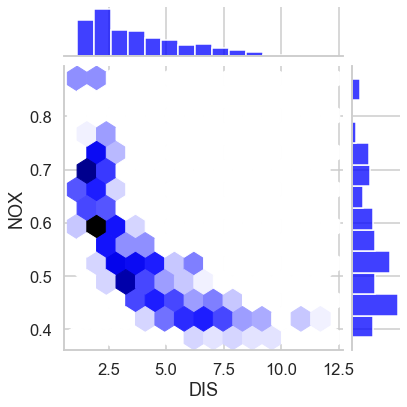

In [42]:
sns.set() ## reset's the styling of charts
plt.figure(figsize=(15,6))
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data['DIS'], y=data['NOX'], color='blue', kind='hex')
plt.show()

<Figure size 1080x432 with 0 Axes>

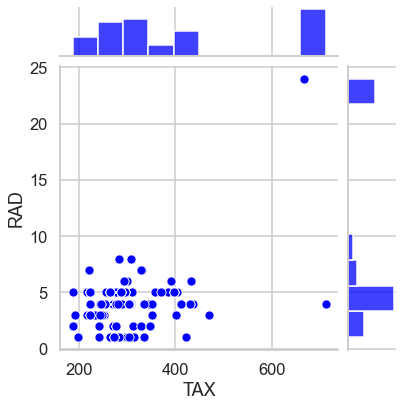

In [43]:
sns.set() ## reset's the styling of charts
plt.figure(figsize=(15,6))
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data['TAX'], y=data['RAD'], color='blue')
plt.show()

C:\Users\rsvmu\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


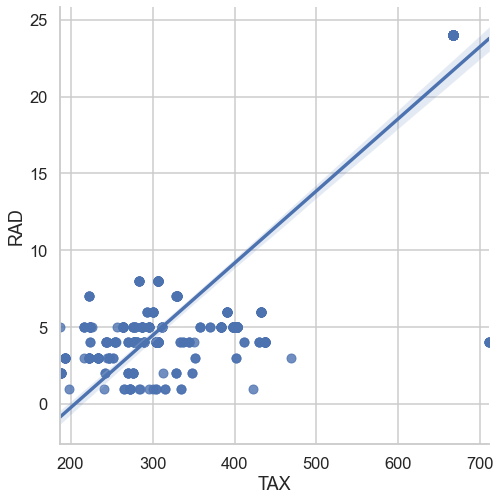

In [44]:
sns.lmplot(x='TAX', y='RAD', data=data, size=7)
plt.show()

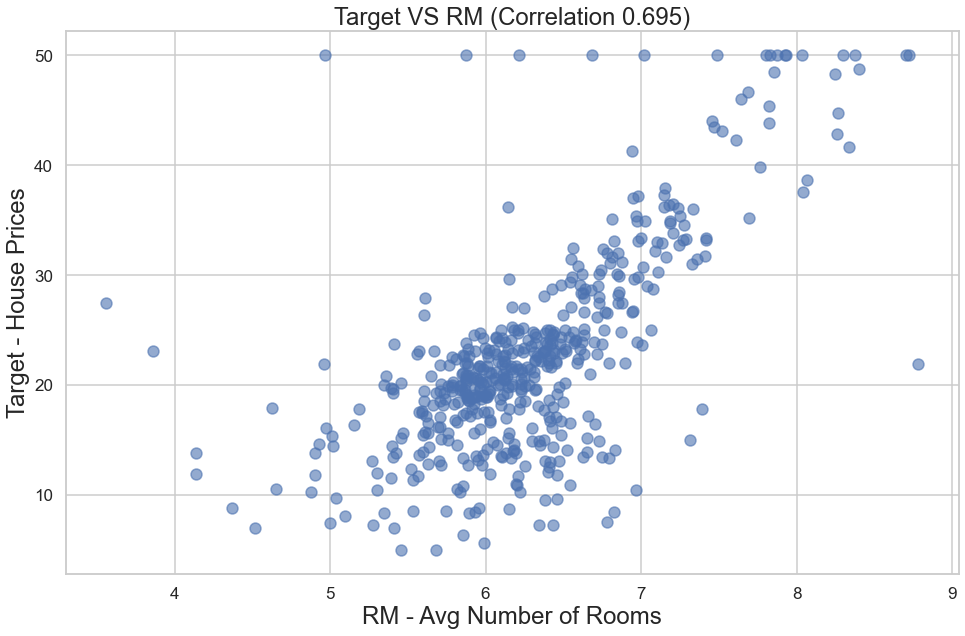

In [45]:
rm_target_corr = data['RM'].corr(data['Target'])

plt.figure(figsize=(16,10))
plt.scatter(y=data['Target'], x=data['RM'], s=120, alpha = 0.6)

plt.title(f'Target VS RM (Correlation {round(rm_target_corr, 3)})', fontsize=24)
plt.ylabel('Target - House Prices', fontsize=24)
plt.xlabel('RM - Avg Number of Rooms', fontsize=24)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

plt.show()

C:\Users\rsvmu\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


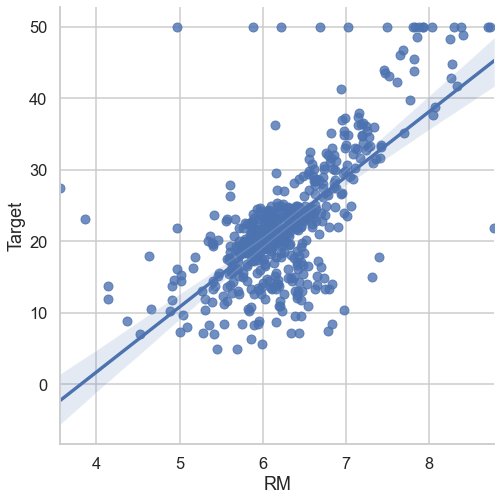

In [46]:
sns.lmplot(x='RM', y='Target', data=data, size=7)
plt.show()

## Pairplot using Seaborn

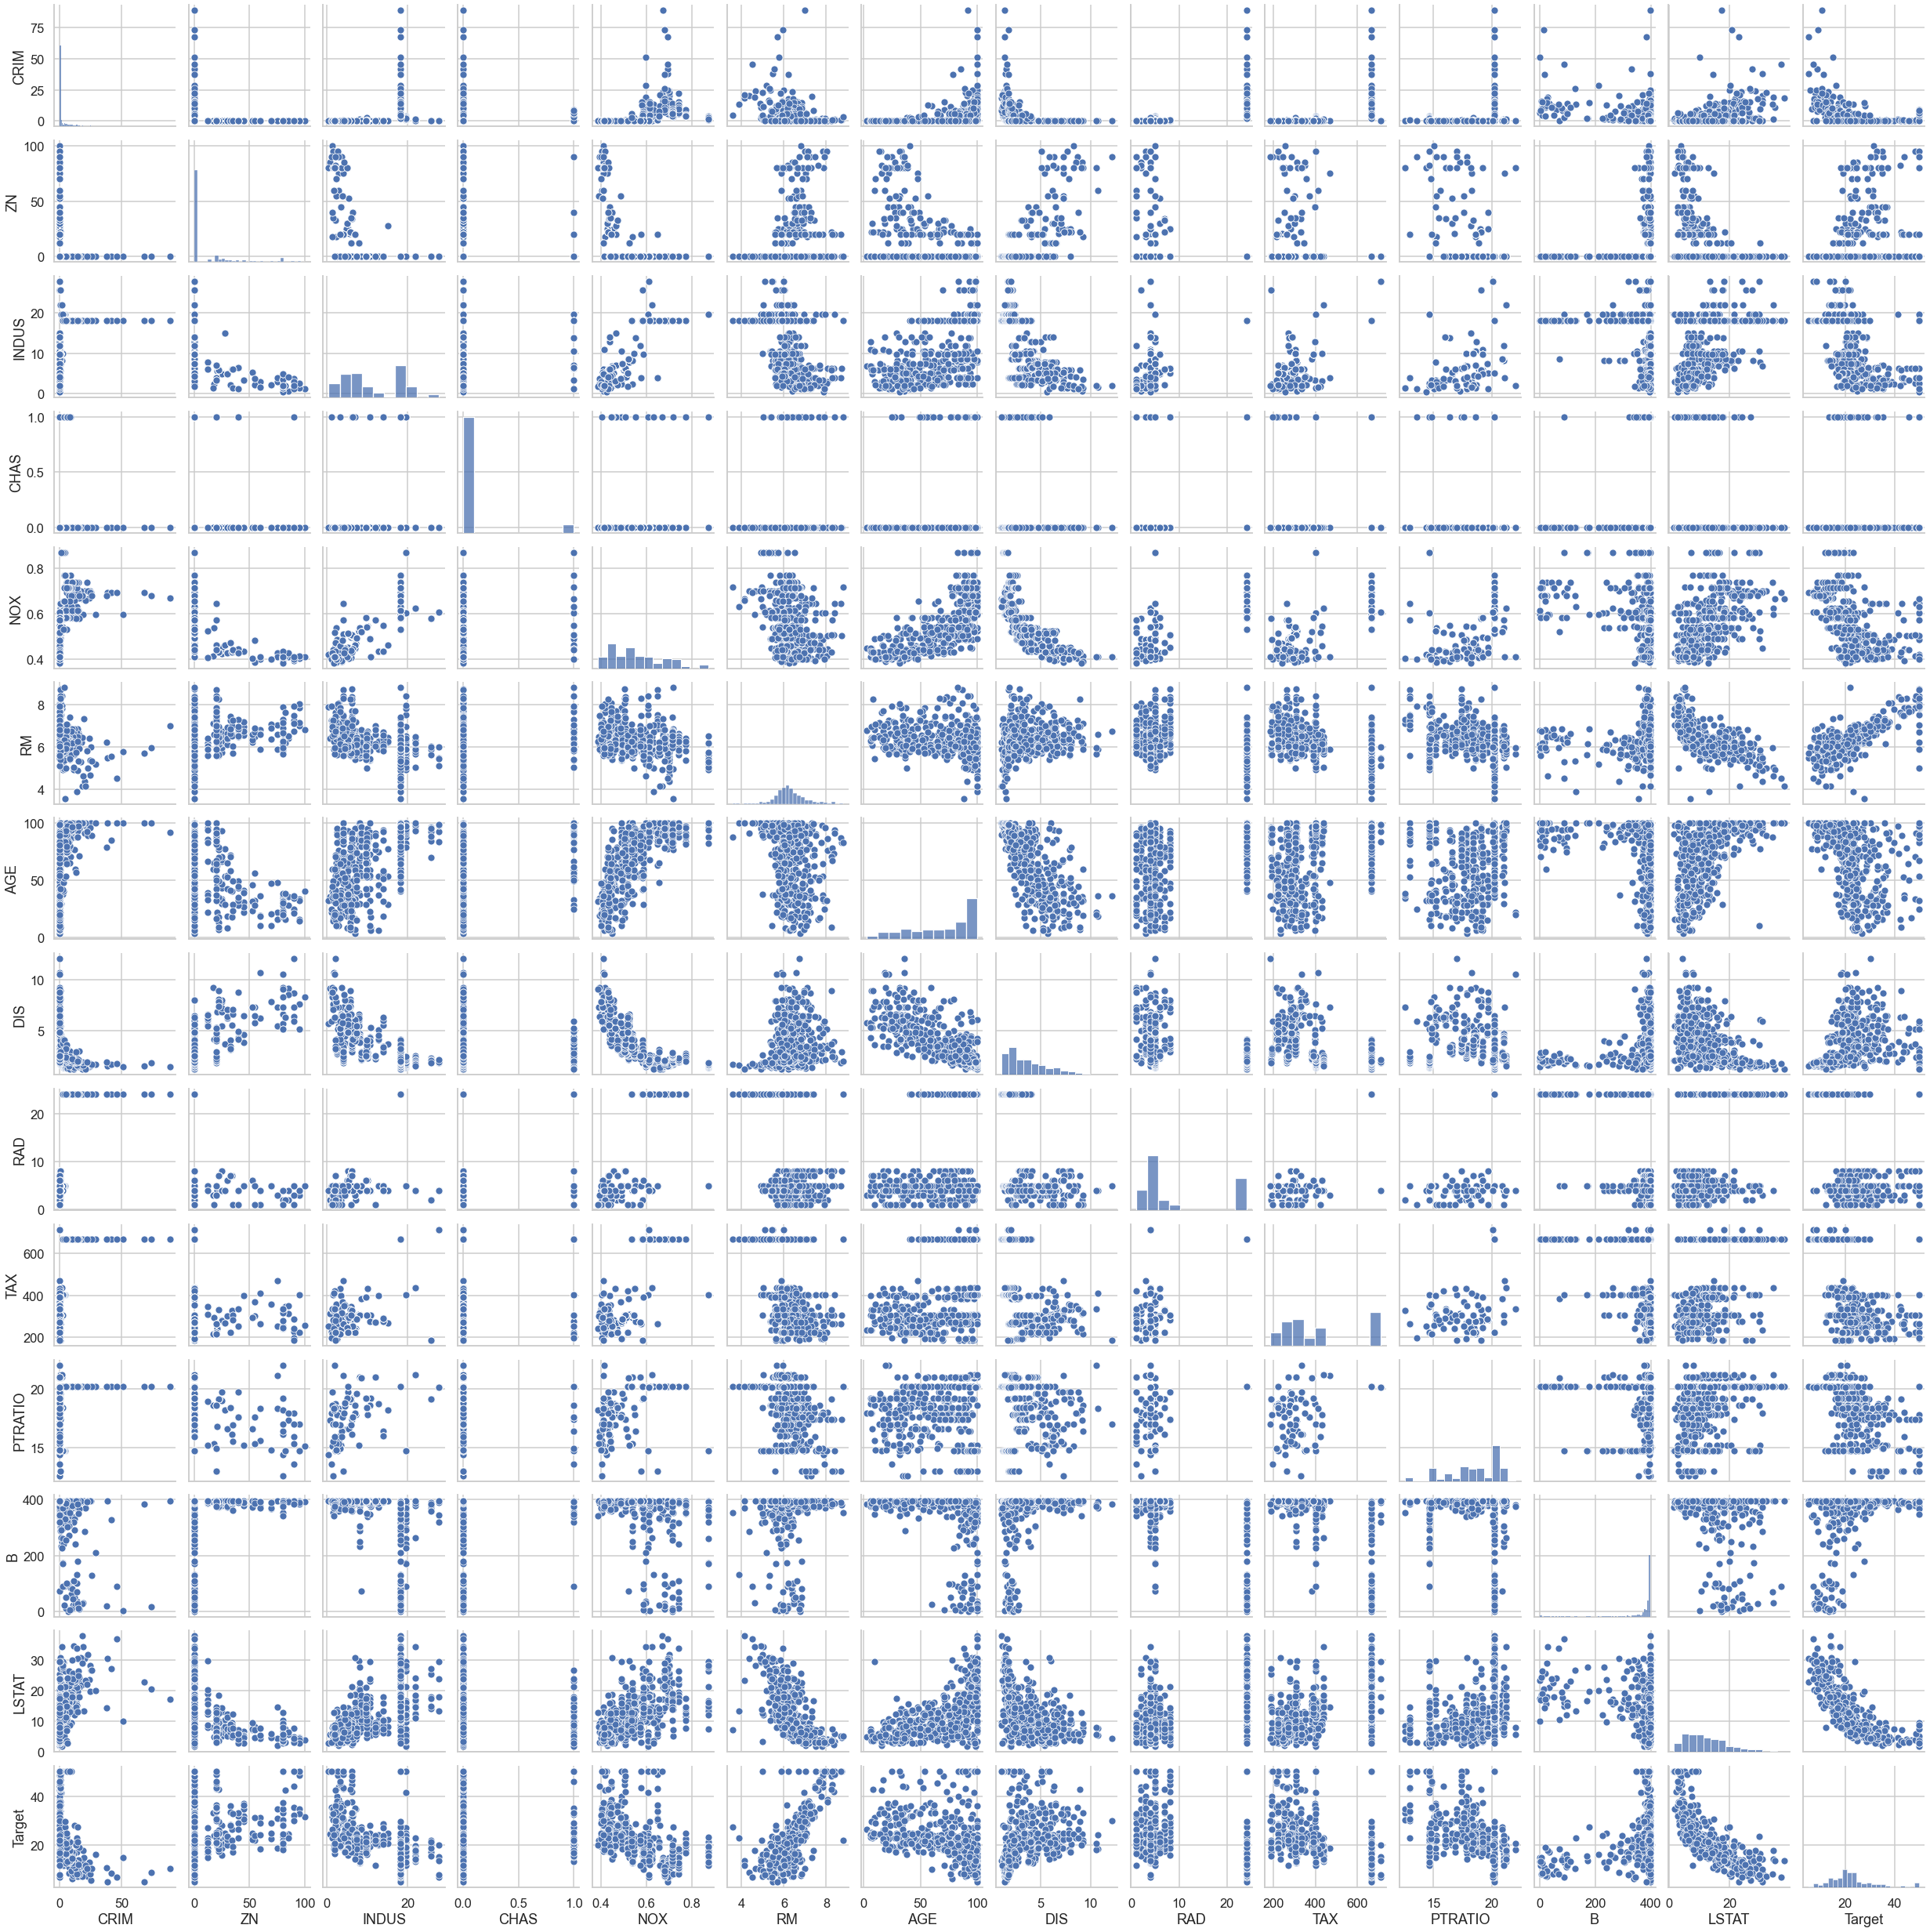

Wall time: 21.9 s


In [47]:
%%time 
# gives us time it took execute the program

sns.pairplot(data) # Scatter plots for every single column in our data Frame
plt.show()

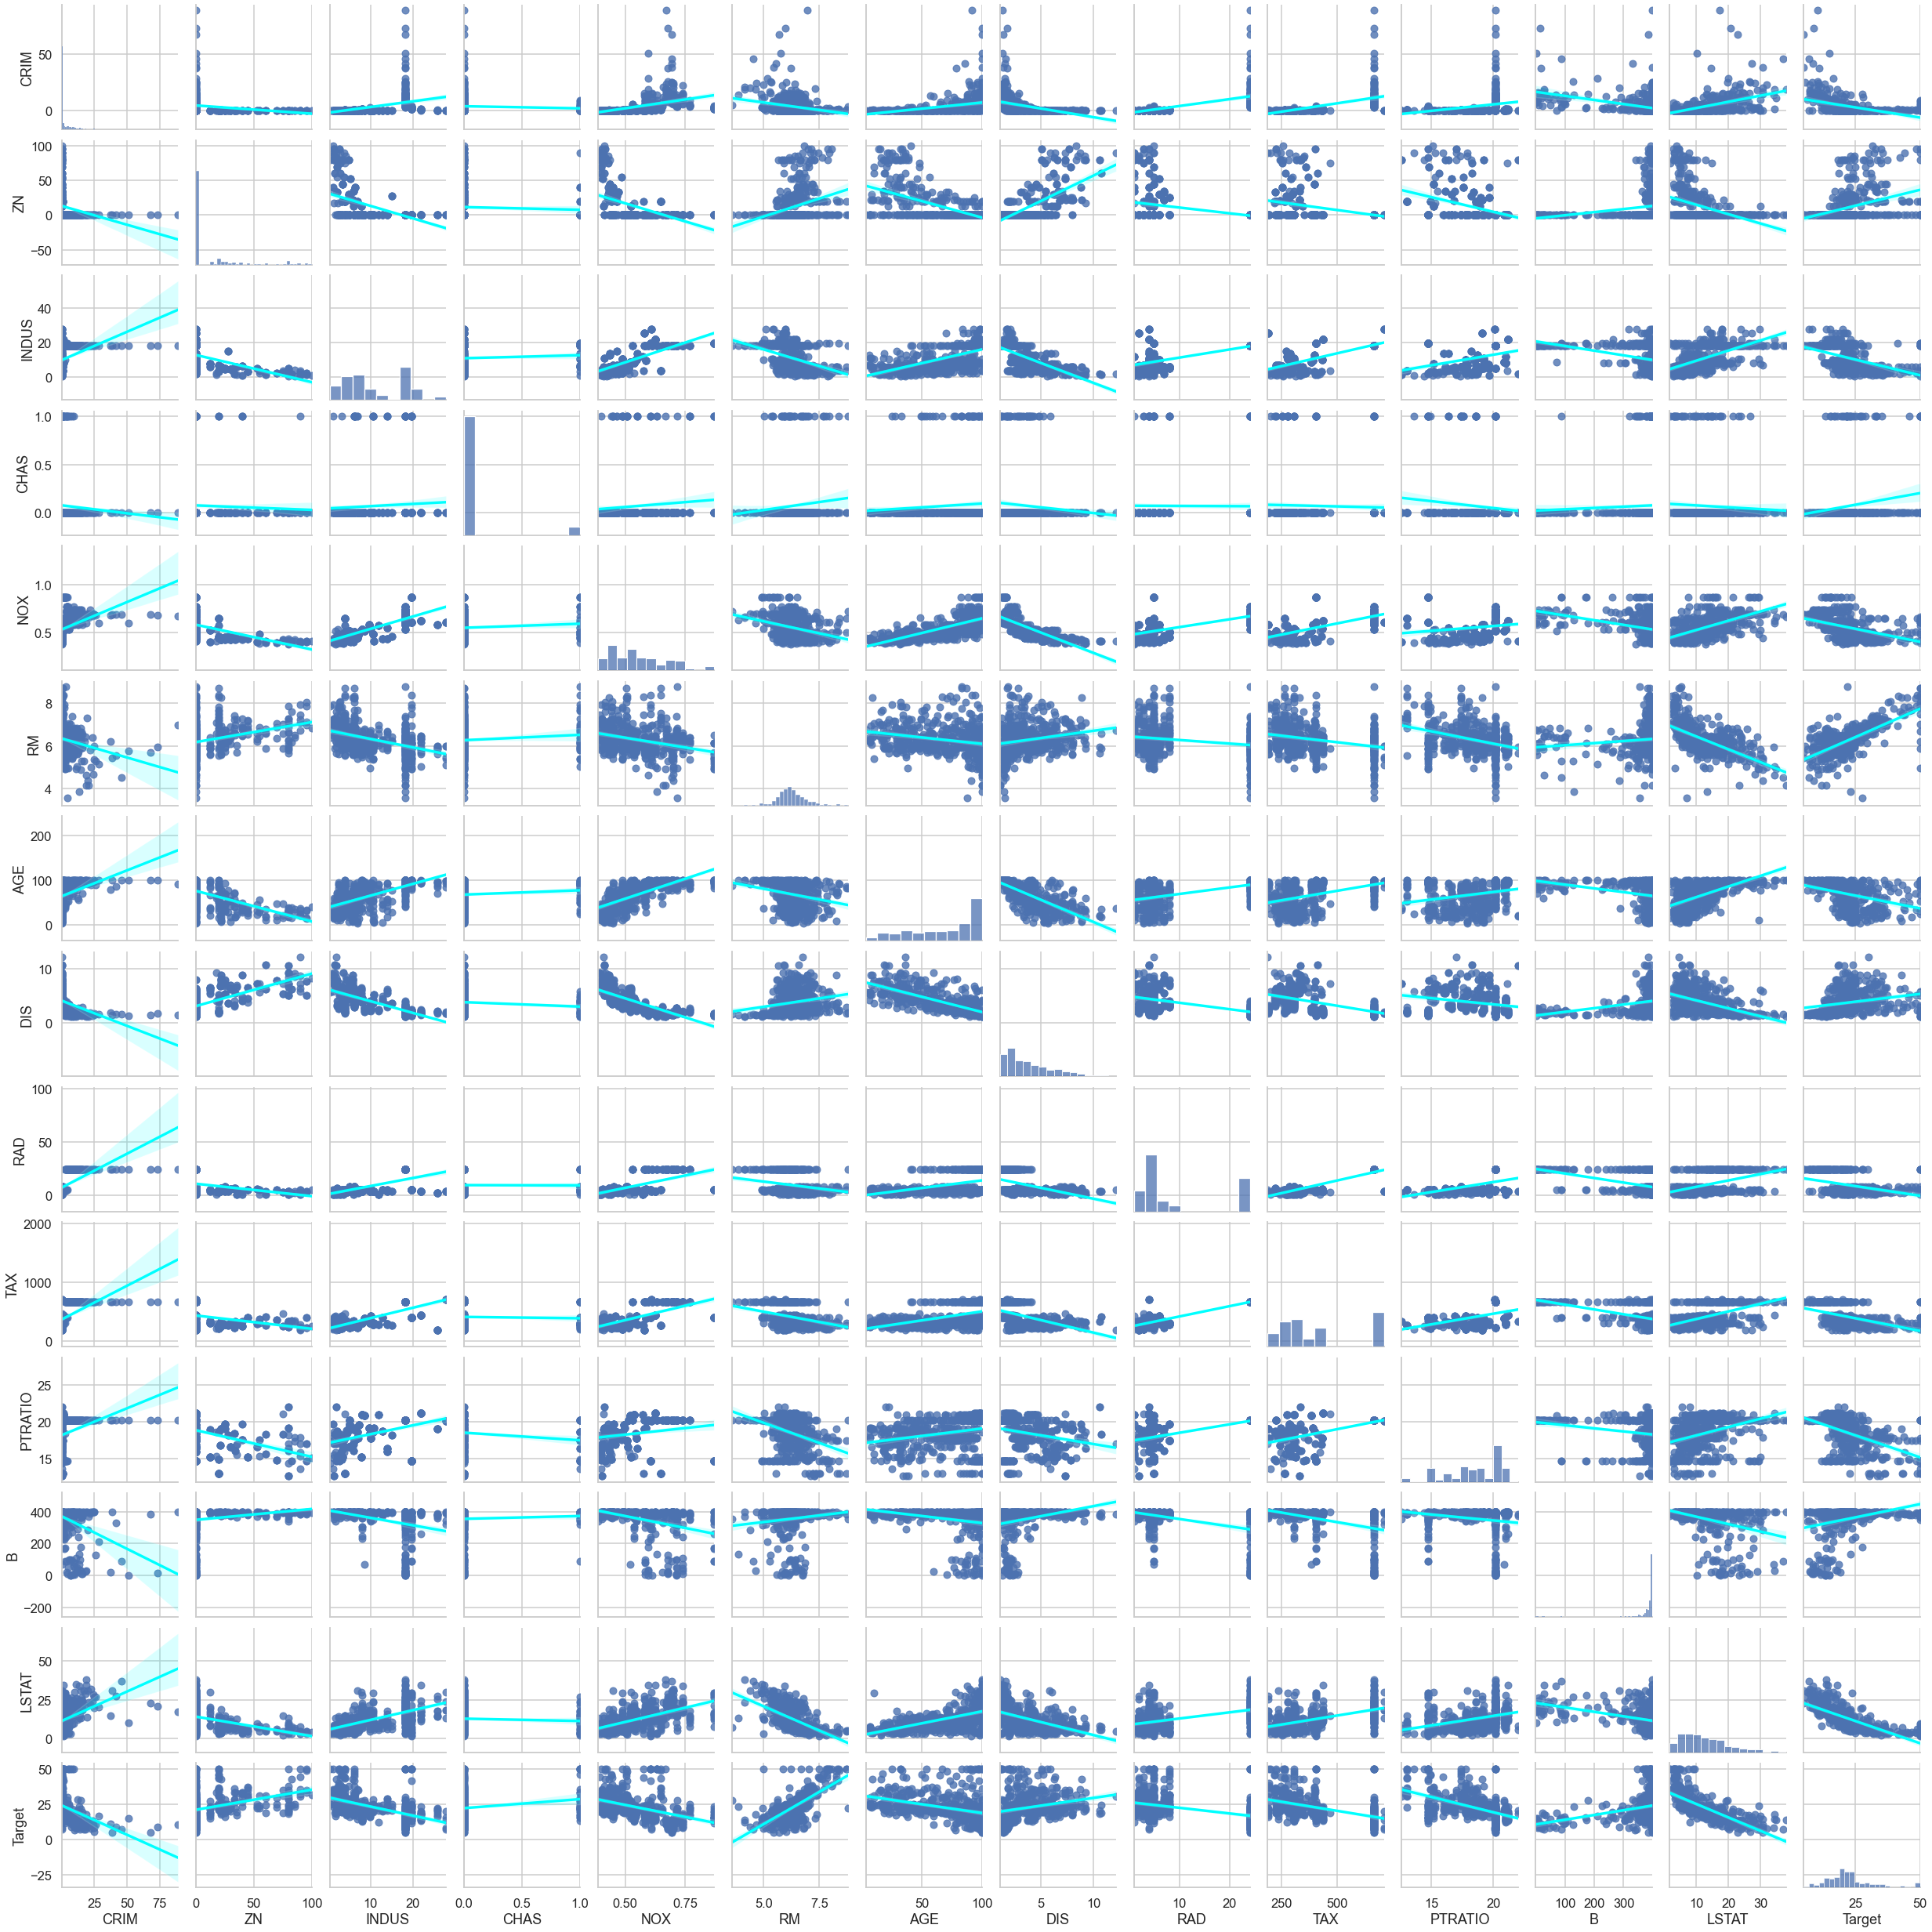

In [48]:
sns.pairplot(data, kind='reg', plot_kws = {'line_kws':{'color':'cyan'}})
plt.show()

## Training and Test Dataset split

In [49]:
prices = data['Target']
features = data.drop('Target', axis=1) # return new dataframe without target

X_train, X_test, y_train, y_test = train_test_split(features, prices,
                                                    test_size=0.2, random_state=10)


# % of training set
#len(X_test)/len(features)

## Multivariable Regression and Model Fit with R-squared

In [50]:
regr = LinearRegression()
regr.fit(X_train, y_train)

print('Intercept', regr.intercept_)
print('Training data r-squared', regr.score(X_train,  y_train))
print('Test data r-squared', regr.score(X_test, y_test))

pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coeff'])

Intercept 36.53305138282439
Training data r-squared 0.750121534530608
Test data r-squared 0.6709339839115628


coeff
CRIM     -0.128181
ZN        0.063198
INDUS    -0.007576
CHAS      1.974515
NOX     -16.271989
RM        3.108456
AGE       0.016292
DIS      -1.483014
RAD       0.303988
TAX      -0.012082
PTRATIO  -0.820306
B         0.011419
LSTAT    -0.581626

## Model Evalutiaon

### Data Transfromations

In [51]:
data['Target'].skew()

1.1080984082549072

In [52]:
# Log transformation for 'Target' series
y_log = np.log(data['Target']) # in orfer to fit the skew.
y_log.head()

0    3.178054
1    3.072693
2    3.546740
3    3.508556
4    3.589059
Name: Target, dtype: float64

In [53]:
y_log.skew()

-0.33032129530987864

C:\Users\rsvmu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


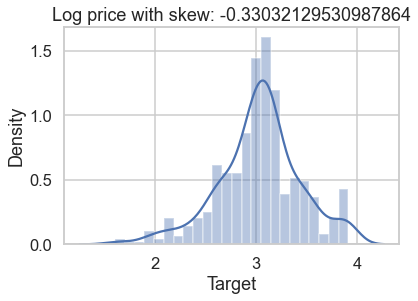

In [54]:
sns.distplot(y_log)
plt.title(f'Log price with skew: {y_log.skew()}')
plt.show()

C:\Users\rsvmu\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


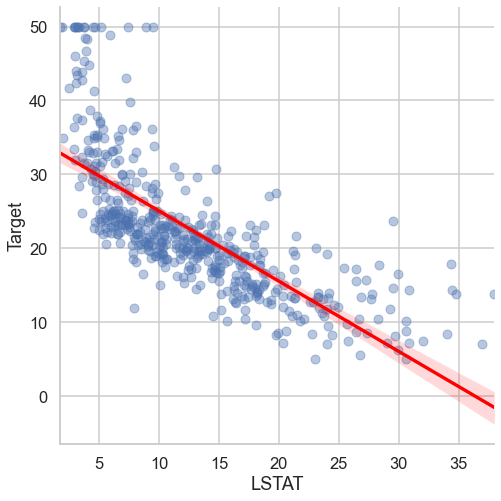

In [55]:
sns.lmplot(x = 'LSTAT', y = 'Target', data = data, size = 7, scatter_kws = {'alpha':0.4}, line_kws = {'color':'red'})
plt.show()

C:\Users\rsvmu\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


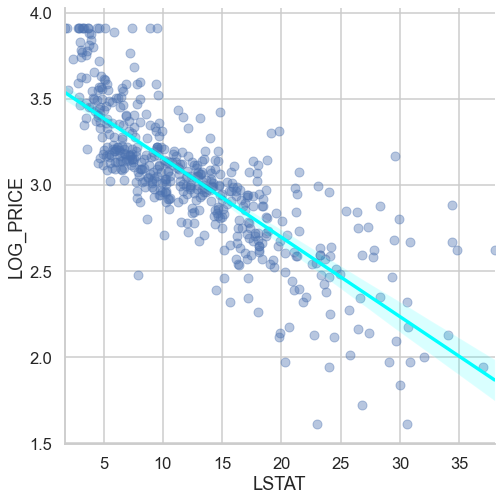

In [56]:
transformed_data = features
transformed_data['LOG_PRICE'] = y_log

sns.lmplot(x = 'LSTAT', y = 'LOG_PRICE', data = transformed_data, size = 7, 
           scatter_kws = {'alpha':0.4}, line_kws = {'color':'cyan'})
plt.show()

## Regression using log prices

In [57]:
prices = np.log(data['Target']) # USE log prices
features = data.drop('Target', axis=1) # return new dataframe without target

X_train, X_test, y_train, y_test = train_test_split(features, prices,
                                                    test_size=0.2, random_state=10)

regr = LinearRegression()
regr.fit(X_train, y_train)

print('Intercept', regr.intercept_)
print('Training data r-squared', regr.score(X_train,  y_train))
print('Test data r-squared', regr.score(X_test, y_test))

pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coeff'])

Intercept 4.05994387177519
Training data r-squared 0.7930234826697583
Test data r-squared 0.7446922306260724


coeff
CRIM    -0.010672
ZN       0.001579
INDUS    0.002030
CHAS     0.080331
NOX     -0.704068
RM       0.073404
AGE      0.000763
DIS     -0.047633
RAD      0.014565
TAX     -0.000645
PTRATIO -0.034795
B        0.000516
LSTAT   -0.031390

In [58]:
# Charles river property Premimum
np.e**(0.080331)


1.0836456950439142

## p-values and Evaluating Coeffivients

In [59]:
X_inclu_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_inclu_const) # Ordinary Least squares just sklearn gives us Linear regr model

results = model.fit()

#results.params
#results.pvalues

pd.DataFrame({'coeff':results.params, 'p-vlaue':round(results.pvalues,4)})

coeff  p-vlaue
const    4.059944   0.0000
CRIM    -0.010672   0.0000
ZN       0.001579   0.0086
INDUS    0.002030   0.4445
CHAS     0.080331   0.0382
NOX     -0.704068   0.0000
RM       0.073404   0.0001
AGE      0.000763   0.2092
DIS     -0.047633   0.0000
RAD      0.014565   0.0000
TAX     -0.000645   0.0001
PTRATIO -0.034795   0.0000
B        0.000516   0.0000
LSTAT   -0.031390   0.0000

## Testing for Multicollinearity

### $$ TAX = \alpha_0 + \alpha_1 RM + \alpha_2 NOX +.....+\alpha_{12} $$

$$ VIF_{TAX} = \frac{1}{(1-R_{TAX} ^ 2)} $$

In [60]:
variance_inflation_factor(exog = X_inclu_const.values, exog_idx = 1)

1.7145250443932485

In [61]:
# No of columns in data Frame
#X_inclu_const.shape
#len(X_inclu_const.columns)

In [62]:
# Loop that prints out all the VIFS for all the Features
for i in range(1,X_inclu_const.shape[1]):
    print(variance_inflation_factor(exog = X_inclu_const.values, exog_idx = i))

1.7145250443932485
2.3328224265597584
3.943448822674636
1.0788133385000578
4.410320817897635
1.8404053075678568
3.3267660823099408
4.222923410477865
7.314299817005058
8.508856493040817
1.839911632651406
1.3386713255364715
2.812544292793034


In [63]:
vif = [(variance_inflation_factor(exog = X_inclu_const.values, exog_idx = i)) for i in range(X_inclu_const.shape[1])]


pd.DataFrame({'coeff_name':X_inclu_const.columns,
              'VIF': np.around(vif, 2)})

# VIF>10 is would be problematic? if no dont need consider about threshold.

coeff_name     VIF
0       const  597.55
1        CRIM    1.71
2          ZN    2.33
3       INDUS    3.94
4        CHAS    1.08
5         NOX    4.41
6          RM    1.84
7         AGE    3.33
8         DIS    4.22
9         RAD    7.31
10        TAX    8.51
11    PTRATIO    1.84
12          B    1.34
13      LSTAT    2.81

## Model Simplification & BIC


In [64]:
# original model with log prices and all features

X_inclu_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_inclu_const) # Ordinary Least squares just sklearn gives us Linear regr model

results = model.fit()

#results.params theta_values
#results.pvalues

org_coef = pd.DataFrame({'coeff':results.params, 'p-vlaue':round(results.pvalues,4)})

print('BIC: ',results.bic)
print('rsqaured: ',results.rsquared)

BIC:  -139.74997769478875
rsqaured:  0.7930234826697582


In [65]:
# Reduced model  #1 excluding INDUS

X_inclu_const = sm.add_constant(X_train)
X_inclu_const = X_inclu_const.drop(['INDUS'], axis=1)

model = sm.OLS(y_train, X_inclu_const) # Ordinary Least squares just sklearn gives us Linear regr model

results = model.fit()

coef_minus_indus = pd.DataFrame({'coeff':results.params, 'p-vlaue':round(results.pvalues,4)})

print('BIC: ',results.bic)
print('rsqaured: ',results.rsquared)

BIC:  -145.14508855591163
rsqaured:  0.7927126289415163


In [66]:
# Reduced model  #2 excluding AGE and INDUS

X_inclu_const = sm.add_constant(X_train)
X_inclu_const = X_inclu_const.drop(['INDUS','AGE'], axis=1)

model = sm.OLS(y_train, X_inclu_const) # Ordinary Least squares just sklearn gives us Linear regr model

results = model.fit()

coef_minus_age_indus = pd.DataFrame({'coeff':results.params, 'p-vlaue':round(results.pvalues,4)})

print('BIC: ',results.bic)
print('rsqaured: ',results.rsquared)

BIC:  -149.49934294224656
rsqaured:  0.7918657661852815


In [67]:
frames = [org_coef, coef_minus_indus, coef_minus_age_indus]
pd.concat(frames, axis = 1)

coeff  p-vlaue     coeff  p-vlaue     coeff  p-vlaue
const    4.059944   0.0000  4.056231   0.0000  4.035922   0.0000
CRIM    -0.010672   0.0000 -0.010721   0.0000 -0.010702   0.0000
ZN       0.001579   0.0086  0.001551   0.0097  0.001461   0.0141
INDUS    0.002030   0.4445       NaN      NaN       NaN      NaN
CHAS     0.080331   0.0382  0.082795   0.0320  0.086449   0.0249
NOX     -0.704068   0.0000 -0.673365   0.0000 -0.616448   0.0001
RM       0.073404   0.0001  0.071739   0.0001  0.076133   0.0000
AGE      0.000763   0.2092  0.000766   0.2070       NaN      NaN
DIS     -0.047633   0.0000 -0.049394   0.0000 -0.052692   0.0000
RAD      0.014565   0.0000  0.014014   0.0000  0.013743   0.0000
TAX     -0.000645   0.0001 -0.000596   0.0000 -0.000590   0.0001
PTRATIO -0.034795   0.0000 -0.034126   0.0000 -0.033481   0.0000
B        0.000516   0.0000  0.000511   0.0000  0.000518   0.0000
LSTAT   -0.031390   0.0000 -0.031262   0.0000 -0.030271   0.0000

## Residual and Residual Plots

In [68]:
#modified model: transformed(using log prices) & simplified (dropping two features)

prices = np.log(data['Target']) # USE log prices
features = data.drop(['Target','INDUS','AGE'], axis=1) # return new dataframe without target

X_train, X_test, y_train, y_test = train_test_split(features, prices,
                                                    test_size=0.2, random_state=10)

# Using Statsmodels ## Training model
X_inclu_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_inclu_const) # Ordinary Least squares just sklearn gives us Linear regr model
results = model.fit()

# Residuals 
# residuals = y_train - results.fittedvalues
# residuals.describe()

#results.resid # residuals attribute in statsmodels.

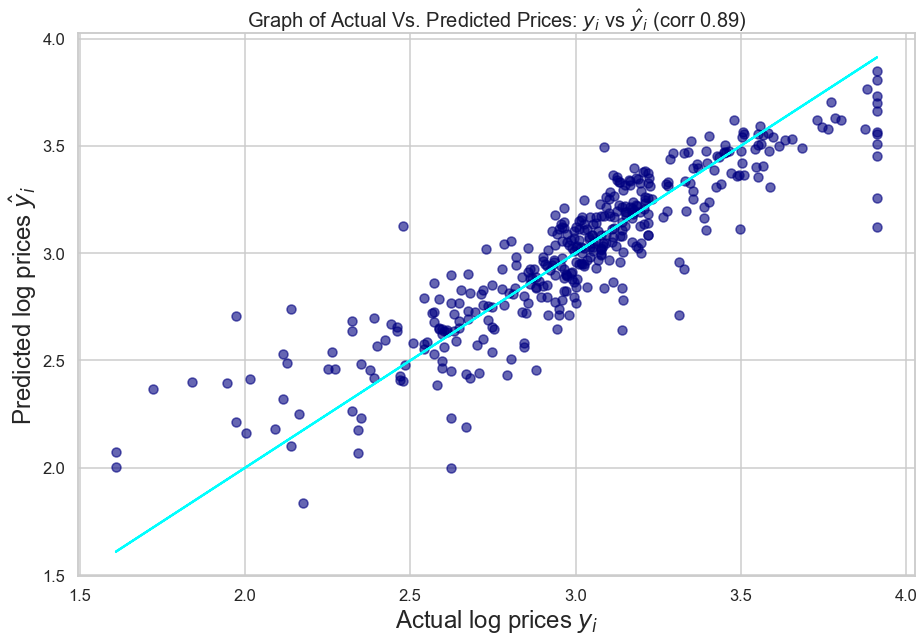

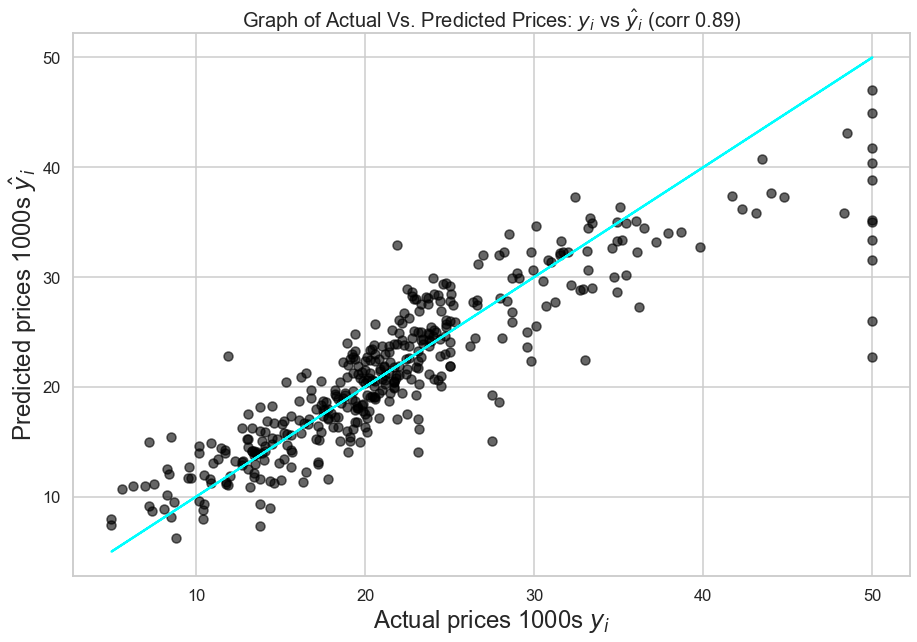

In [69]:
# Graph of Actual Vs. Predicted Prices
corr = round(y_train.corr(results.fittedvalues), 2)
plt.figure(figsize = (15,10))
plt.scatter(x = y_train, y = results.fittedvalues, c='navy', alpha=0.6)
plt.plot(y_train, y_train, color = 'cyan')

plt.xlabel('Actual log prices $y _i$', fontsize = 24)
plt.ylabel('Predicted log prices $\hat y _i$', fontsize = 24)
plt.title(f'Graph of Actual Vs. Predicted Prices: $y _i$ vs $\hat y _i$ (corr {corr})',fontsize = 20)
plt.show()


plt.figure(figsize = (15,10))
plt.scatter(x = np.e**y_train, y = np.e**results.fittedvalues, c='black', alpha=0.6)
plt.plot(np.e**y_train, np.e**y_train, color = 'cyan')

plt.xlabel('Actual prices 1000s $y _i$', fontsize = 24)
plt.ylabel('Predicted prices 1000s $\hat y _i$', fontsize = 24)
plt.title(f'Graph of Actual Vs. Predicted Prices: $y _i$ vs $\hat y _i$ (corr {corr})',fontsize = 20)
plt.show()


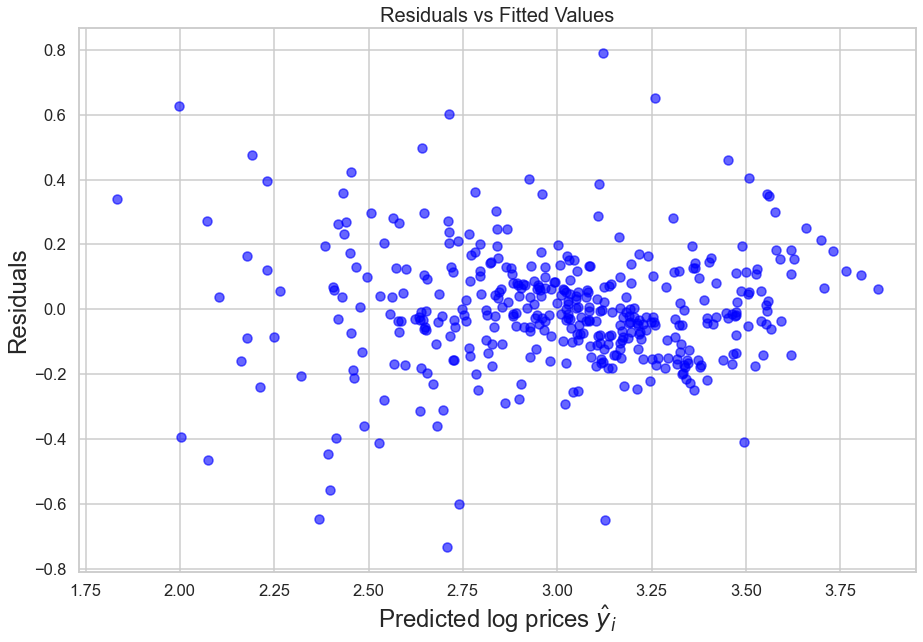

In [70]:
# Residual Vs Predicted Values
plt.figure(figsize = (15,10))
plt.scatter(x = results.fittedvalues, y =results.resid, c='blue', alpha=0.6)

plt.xlabel('Predicted log prices $\hat y _i$', fontsize = 24)
plt.ylabel('Residuals', fontsize = 24)
plt.title('Residuals vs Fitted Values',fontsize = 20)
plt.show()

# Mean Squared Error and R-squared

reduced_log_mse = round(results.mse_resid, 3)
reduced_log_rsquared = round(results.rsquared,3)

### Distributions of Residuals (log prices) - checking for normality

C:\Users\rsvmu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


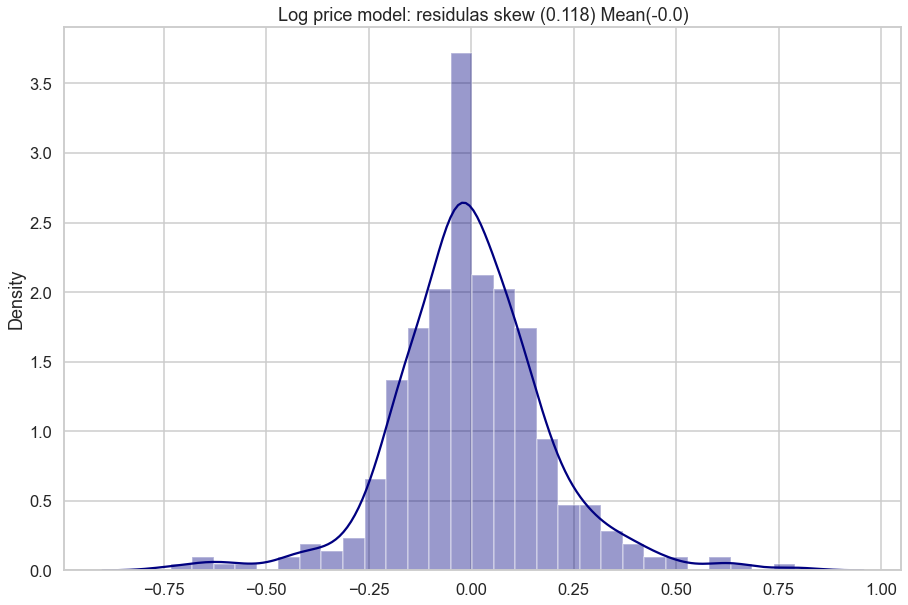

In [71]:
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

plt.figure(figsize = (15,10))
sns.distplot(results.resid, color = 'navy')
plt.title(f"Log price model: residulas skew ({resid_skew}) Mean({resid_mean})")
plt.show()

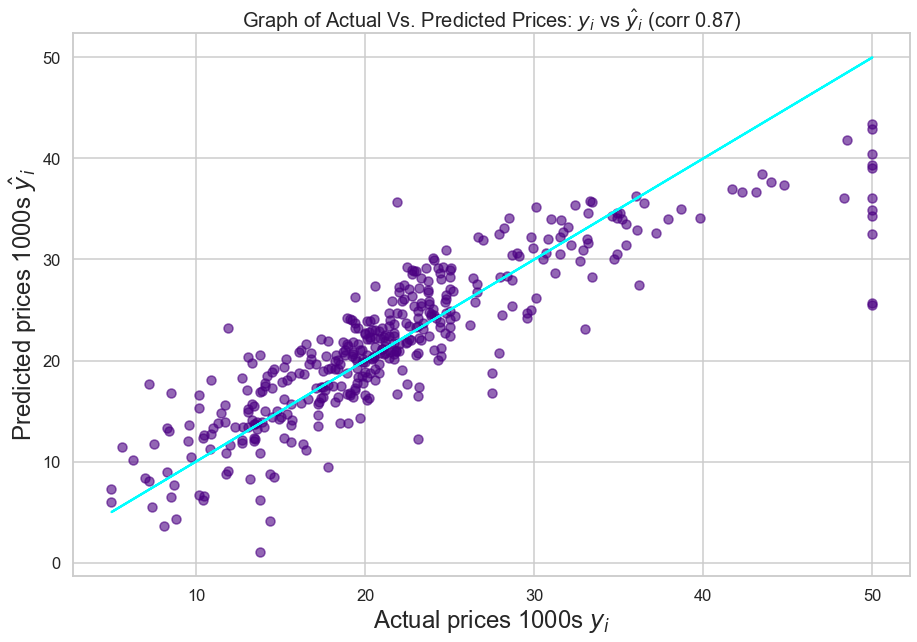

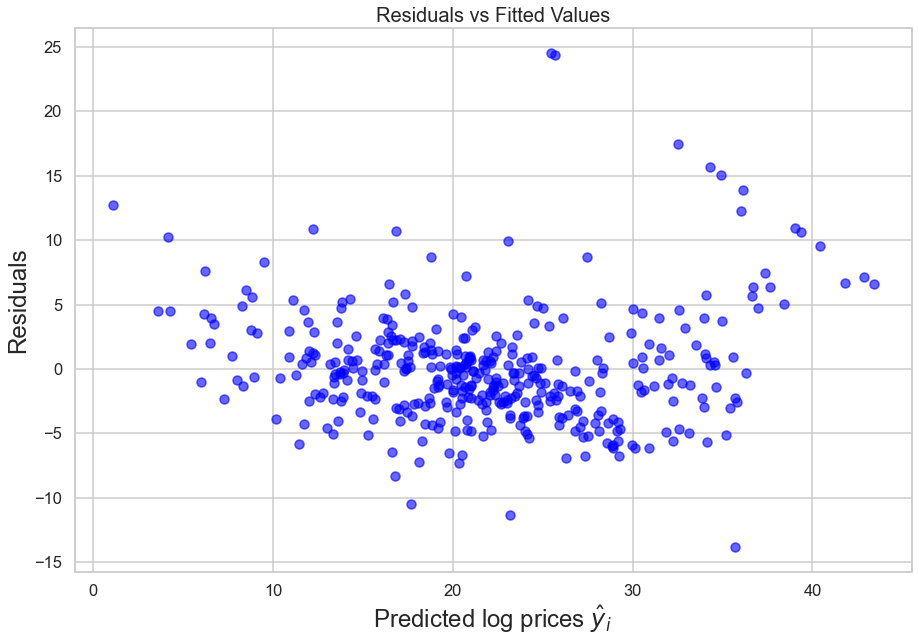

C:\Users\rsvmu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


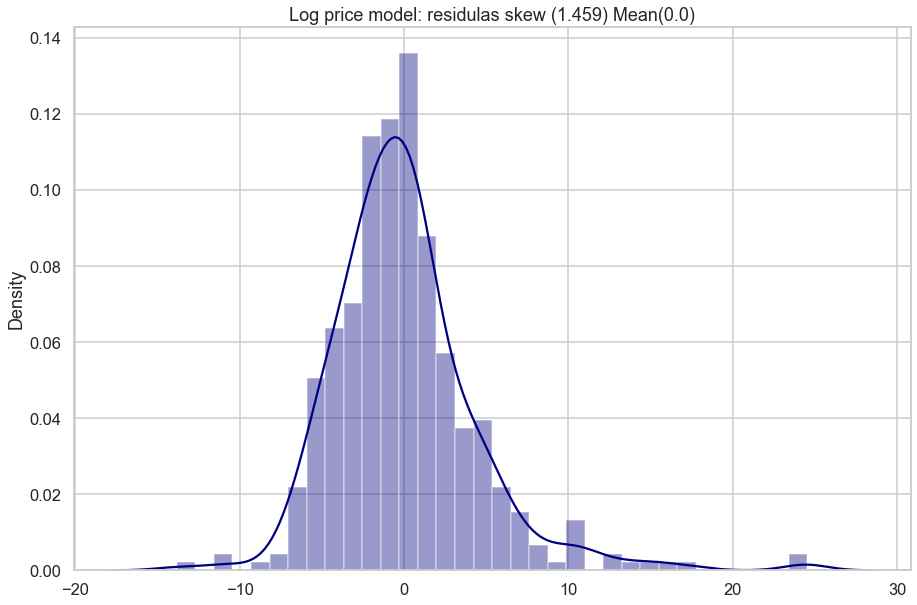

In [72]:
#origianl model: normal prices & all features

prices = data['Target']
features = data.drop(['Target'], axis=1) # return new dataframe without target

X_train, X_test, y_train, y_test = train_test_split(features, prices,
                                                    test_size=0.2, random_state=10)

# Using Statsmodels ## Training model
X_inclu_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_inclu_const) # Ordinary Least squares just sklearn gives us Linear regr model
results = model.fit()

# Graph of Actual Vs. Predicted Prices
corr = round(y_train.corr(results.fittedvalues), 2)
plt.figure(figsize = (15,10))
plt.scatter(x = y_train, y = results.fittedvalues, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color = 'cyan')

plt.xlabel('Actual prices 1000s $y _i$', fontsize = 24)
plt.ylabel('Predicted prices 1000s $\hat y _i$', fontsize = 24)
plt.title(f'Graph of Actual Vs. Predicted Prices: $y _i$ vs $\hat y _i$ (corr {corr})',fontsize = 20)
plt.show()

# Residual Vs Predicted Values
plt.figure(figsize = (15,10))
plt.scatter(x = results.fittedvalues, y =results.resid, c='blue', alpha=0.6)

plt.xlabel('Predicted log prices $\hat y _i$', fontsize = 24)
plt.ylabel('Residuals', fontsize = 24)
plt.title('Residuals vs Fitted Values',fontsize = 20)
plt.show()

# Residual Distribution

resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

plt.figure(figsize = (15,10))
sns.distplot(results.resid, color = 'navy')
plt.title(f"Log price model: residulas skew ({resid_skew}) Mean({resid_mean})")
plt.show()

# Mean Squared Error and R-squared

full_normal_mse = round(results.mse_resid, 3)
full_normal_rsquared = round(results.rsquared,3)

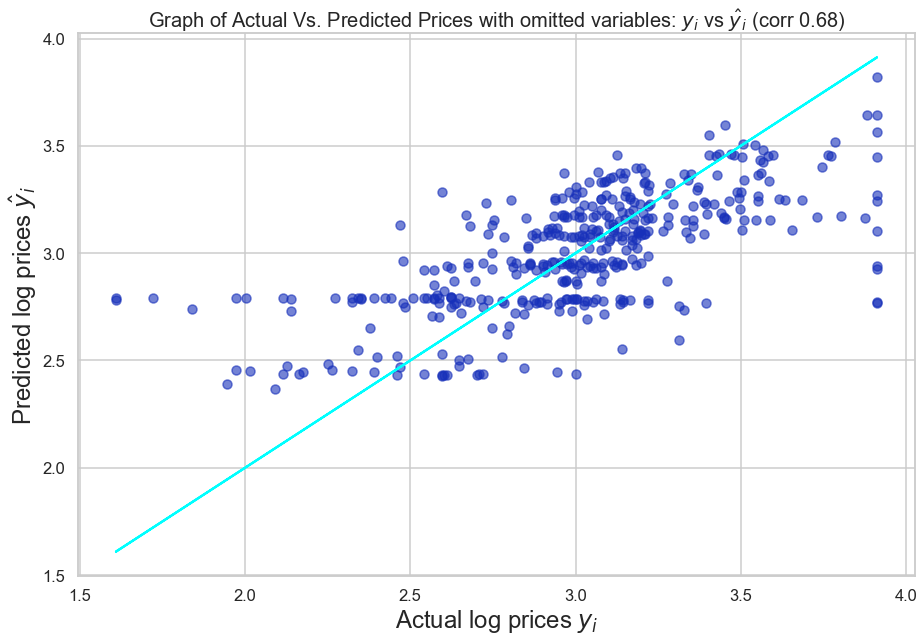

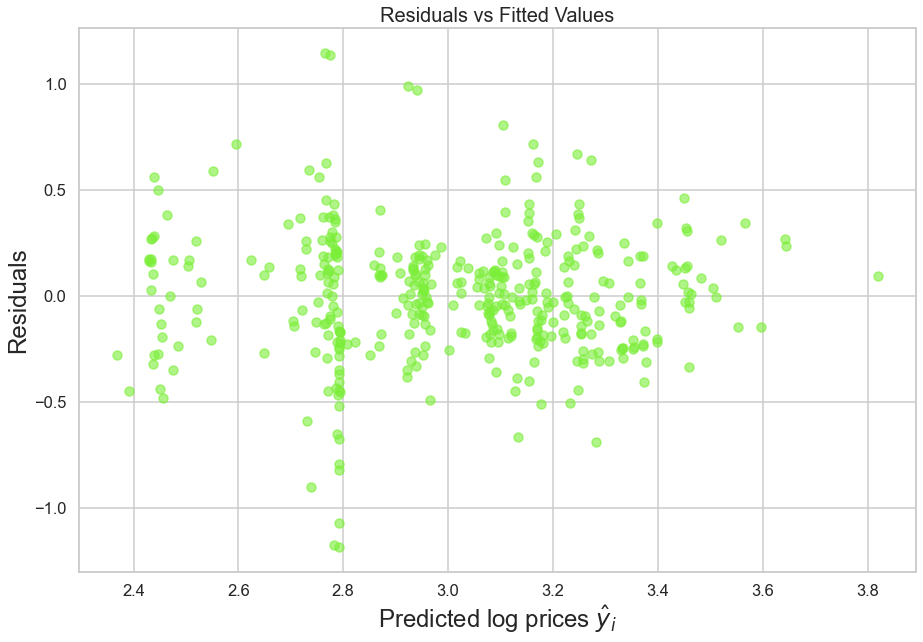

In [73]:
# model omitting key features using log prices

prices = np.log(data['Target'])
features = data.drop(['Target','INDUS','NOX', 'RM','AGE','LSTAT','CRIM'], axis=1) # return new dataframe without target

X_train, X_test, y_train, y_test = train_test_split(features, prices,
                                                    test_size=0.2, random_state=10)

# Using Statsmodels ## Training model
X_inclu_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_inclu_const) # Ordinary Least squares just sklearn gives us Linear regr model
results = model.fit()

# Graph of Actual Vs. Predicted Prices
corr = round(y_train.corr(results.fittedvalues), 2)
plt.figure(figsize = (15,10))
plt.scatter(x = y_train, y = results.fittedvalues, c='#1730BA', alpha=0.6)
plt.plot(y_train, y_train, color = 'cyan')

plt.xlabel('Actual log prices $y _i$', fontsize = 24)
plt.ylabel('Predicted log prices $\hat y _i$', fontsize = 24)
plt.title(f'Graph of Actual Vs. Predicted Prices with omitted variables: $y _i$ vs $\hat y _i$ (corr {corr})',fontsize = 20)
plt.show()

# Residual Vs Predicted Values
plt.figure(figsize = (15,10))
plt.scatter(x = results.fittedvalues, y =results.resid, c='#7BEE38', alpha=0.6)

plt.xlabel('Predicted log prices $\hat y _i$', fontsize = 24)
plt.ylabel('Residuals', fontsize = 24)
plt.title('Residuals vs Fitted Values',fontsize = 20)
plt.show()


# Mean Squared Error and R-squared

omitted_val_mse = round(results.mse_resid, 3)
omitted_val_rsquared = round(results.rsquared,3)

In [74]:
pd.DataFrame({'R-squared':[reduced_log_rsquared, full_normal_rsquared, omitted_val_rsquared],
             'MSE':[reduced_log_mse, full_normal_mse, omitted_val_mse],
             'RMSE':np.sqrt([reduced_log_mse, full_normal_mse, omitted_val_mse])}, 
            index=['Reduced_log model','full_price_model','omitted var value'])

R-squared     MSE      RMSE
Reduced_log model      0.792   0.035  0.187083
full_price_model       0.750  19.921  4.463295
omitted var value      0.460   0.090  0.300000

In [75]:
#yeah, for a house price of 30000 dollars.
#Can you calculate the upper and lower bound for a 95 percent prediction interval using the reduced log
# Standard deviation
print('1 s.d in lof prices is',np.sqrt(reduced_log_mse))
print('2 s.d in lof prices is',2*np.sqrt(reduced_log_mse))

upper_bound = np.log(30) + 2*np.sqrt(reduced_log_mse)
print('The upper bound in log prices for 95% prediction interval is', upper_bound)
print('The upper bound in normal prices for$', np.e**upper_bound *1000)

lower_bound = np.log(30) - 2*np.sqrt(reduced_log_mse)
print('The lower bound in log prices for 95% prediction interval is', lower_bound)
print('The lower bound in normal prices for$', np.e**lower_bound *1000)

1 s.d in lof prices is 0.18708286933869708
2 s.d in lof prices is 0.37416573867739417
The upper bound in log prices for 95% prediction interval is 3.7753631203395495
The upper bound in normal prices for$ 43613.34233239937
The lower bound in log prices for 95% prediction interval is 3.0270316429847615
The lower bound in normal prices for$ 20635.886906824155
